## Gaussian Naive Bayes

In [8]:
%%HTML
<h2>Intuition</h2>
<p>Assume that data from each cluster comes from a Gaussian Distribution with <b>Covariance Matrix</b> = <b>I</b></p>

$\Huge P(k|X_i) = \frac{P(X_i|k)P(k)}{P(X_i)} $

To decide wether $X_i$ belongs to cluster k, since the denominator of the Posterior is the sample for all cluster
so we just need to compare $P(X_i|k)P(k)$ for each cluster

By default, the prior $\mathit{P(k)}$ of each cluster is equal to $\frac{N_k}{N}$ where $\mathbf{N_k}$ is the size of the $k^{th}$ cluster and $\mathbf{N}$ if the size of the entire distribution

In [1]:
import matplotlib.pyplot as plt;
import numpy as np;
import seaborn as sns;
sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(100, centers = 2, cluster_std = 1.5)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'RdBu')

In [2]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [3]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)

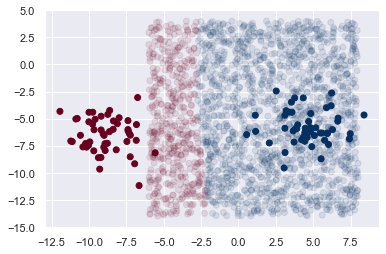

In [4]:
y_pred = model.predict(Xnew)
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'RdBu')
plt.scatter(Xnew[:,0], Xnew[:,1], c = y_pred, cmap = 'RdBu', alpha = .1)

In [5]:
%%HTML
<h2>Predict Probability for each cluster</h2>

In [6]:
model.predict_proba(Xnew)

array([[6.91947960e-13, 1.00000000e+00],
       [7.13382170e-15, 1.00000000e+00],
       [6.16177273e-08, 9.99999938e-01],
       ...,
       [9.99973272e-01, 2.67283088e-05],
       [2.04052598e-08, 9.99999980e-01],
       [3.22826263e-28, 1.00000000e+00]])

## Multinomial Naive Bayes

In [10]:
%%HTML
<h2>Text Classification</h2>

In [16]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

Available categories:

In [17]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity, we only chose a few categories to work on

In [19]:
cats = ['comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware','misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball']
train = fetch_20newsgroups(subset = 'train', categories=cats)
test = fetch_20newsgroups(subset = 'test', categories=cats)


In [25]:
train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [31]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
y_pred = model.predict(test.data)
y = test.target
accuracy_score(y_pred, y)


0.8821292775665399

Text(89.133125, 0.5, 'Predict Label')

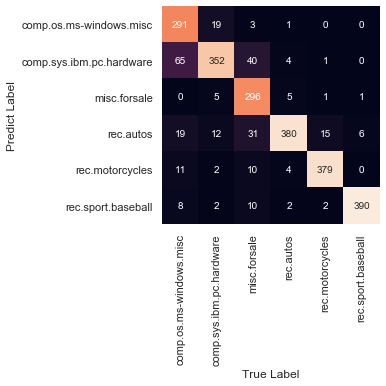

In [36]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred, y)
sns.heatmap?
sns.heatmap(matrix, annot = True, cbar = False, square = True, fmt = 'd', 
           xticklabels = train.target_names, yticklabels=train.target_names)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

In [37]:
%%HTML
<h4>Classification for new documents</h4>

In [42]:
docs = ['My favorite motorcycle is Dugati', 'Can you hack this computer', 'Can you throw this ball into the basket']
np.array(train.target_names)[model.predict(docs)]

array(['rec.motorcycles', 'comp.sys.ibm.pc.hardware',
       'rec.sport.baseball'], dtype='<U24')

In [46]:
import pandas as pd
df = pd.DataFrame(model.predict_proba(docs), columns = train.target_names)
df

,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball
0,0.096220,0.106894,0.078613,0.127479,0.466372,0.124423
1,0.179616,0.235425,0.142223,0.165634,0.146872,0.130230
2,0.125122,0.120697,0.069407,0.160960,0.141069,0.382744


## When to use Naive Bayes?

In [47]:
%%HTML
<p>These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem. 
If it does not perform well, then you can begin exploring more sophisticated models,
with some baseline knowledge of how well they should perform.</p>
<ul>
<li>When the naive Assumption we make actually match the data (rarely in the real world)</li>
<li>When data is well separated</li>
<li>Data is in very high-dimension where the complexity of the model is less important</li>
</ul>